#### __Taller I: Ciencia de Datos para Auditores 2024/2025__
##### Duración: 2hs

**Temas**:

- Primer paso: Planificar el objetivo y entender el negocio.
- Porqué Python? Diferentes entornos. Porque Google Collab? Que es un notebook? Texto enriquecido. Librerias.
- Leer bases de datos de diferentes orígenes. Caso 1) Local CSV o Excel. Caso 2) De la nube una base de datos abierta.
- Introducción a Pandas: head, tall, metodos estadísticos, Subgrupos con una o mas condiciones. Introducción al análisis exploratorio.
- Limpieza de datos: datos duplicados, datos faltantes y posibles soluciones.
- Ordenando, agrupando y creando tablas pivot.
- Muestreo aleatorio en base a un nivel de confianza y margen de error parametrizado.
- Ley de Bedford.
- Guardar bases de datos en CSV y Excel.

#### __Introducción: Planificando el objetivo y entendiendo el negocio. Preguntas de Auditoría.__
Primeros pasos con Python. Entornos. Librerías.

#### __Instalando Librerías__

La primera vez que utilicemos una librería, debemos instalarla (si utilizamos Google Colab, las librerías más populares se encuentran pre instaladas)
Para instalar una librería, ejecutaremos en una celda de código: *!pip install libreria*

In [1]:
# Para insertar un comentario en una celda de códgio, debemos anteponer el #

# ! pip install seaborn
# ! pip install pandas
# ! pip install matplotlib
# ! pip install openpyxl

#### __Importamos las librerías__

In [9]:
# Importamos las librerías a utilizar

import numpy as np  # Librería más utilizada para funciones numéricas
import pandas as pd  # Librería para gestionar estructuras de datos en formato de filas y columnas
import matplotlib.pyplot as plt  # Librería para realizar gráficos
from openpyxl import Workbook  # Librería para exportar Excel

# Ocultamos los mensajes de advertencia
import warnings
warnings.filterwarnings('ignore')

import sys
import math

# Ajustamos algunos parámetros en Pandas
pd.options.display.max_rows = 99  # Establece el límite de filas a mostrar de un DataFrame
# Ajustamos la visualización de números con decimales, separando los miles y dejando solo 2 decimales
pd.set_option('display.float_format', '{:,.2f}'.format)


In [7]:
!pip install openpyxl

  Using cached openpyxl-3.1.5-py2.py3-none-any.whl.metadata (2.5 kB)
  Using cached et_xmlfile-2.0.0-py3-none-any.whl.metadata (2.7 kB)
Using cached openpyxl-3.1.5-py2.py3-none-any.whl (250 kB)
Using cached et_xmlfile-2.0.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


#### __Leer bases de datos de diferentes orígenes.__
El proceso de leer y empezar a trabajar con una base de datos depende de sus características, tales como configuración correcta de símbolos (encoding), especificación de sus columnas y tipos de datos. Para el caso de archivos de texto con un delimitador (csv) es importante especificar correctamente el mismo.

Podemos optar por lee una Base de Datos guardada localmente por lo que les sugerimos guaradr la Base de Datos en el mismo directorio que nuestro Notebook (.ipnb).

También les dejamos aquí un ejemplo para leer la misma Base de Datos desde el portal de datos abiertos de la Ciudad de Buenos Aires en la Nube.

In [ ]:
#CSV = pd.read_csv('C:\Users\fvillagra\Downloads\CIENCIA DE DATOS PARA AUDITORES\compras-coronavirus.csv' ,sep=';', encoding-'iso-8859-1')

##### __Como vemos en el ejemplo de arriba, a veces hay que especificar el separador y/o encoding.__

In [ ]:
# Montar Google Drive para entorno Colab
from google.colab import drive
drive.mount('/content/gdrive')

In [16]:
# Verificamos si el archivo CSV existe o no:
import os

ruta = r'C:\Users\fvillagra\Downloads\CIENCIA DE DATOS PARA AUDITORES\compras-coronavirus.csv'

if os.path.exists(ruta):
    print("El archivo existe")
else:
    print("El archivo NO existe")

El archivo existe


In [17]:
# Usamos open() para verificar permisos:
with open(ruta, 'r', encoding='utf-8') as file:
    print("El archivo se abrió correctamente")

El archivo se abrió correctamente


In [24]:
!pip install chardet


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached chardet-5.2.0-py3-none-any.whl.metadata (3.4 kB)
Using cached chardet-5.2.0-py3-none-any.whl (199 kB)


In [25]:
# Detectar la codificación:
import chardet

with open('compras-coronavirus.csv', 'rb') as f:
    result = chardet.detect(f.read())
    
print(result['encoding'])

ISO-8859-1


In [36]:
import pandas as pd

# Cargar el CSV en un DataFrame
df = pd.read_csv('compras-coronavirus.csv', encoding='ISO-8859-1', delimiter=';')

# Ver el contenido del DataFrame
print(df)

                    fecha     nro_pliego  nro_orden_de_compra   \
0     2020-01-06 00:00:00  410-0571-LPU20        410-5743-OC20   
1     2020-01-06 00:00:00  421-3460-CME19        421-5768-OC20   
2     2020-01-06 00:00:00  421-3460-CME19        421-5768-OC20   
3     2020-01-06 00:00:00  421-3460-CME19        421-5768-OC20   
4     2020-01-06 00:00:00  422-0575-LPU20        422-5795-OC20   
...                   ...             ...                  ...   
1793  2021-06-28 00:00:00  418-0812-CDI21        418-7265-OC21   
1794  2021-06-28 00:00:00  439-0966-CME21        439-7337-OC21   
1795  2021-06-28 00:00:00  432-1204-CME21        432-7333-OC21   
1796  2021-06-28 00:00:00  425-1398-CME21        425-7120-OC21   
1797  2021-06-29 00:00:00  418-0579-CDI21        418-7358-OC21   

                     unidad_ejecutora         jurisdiccion  \
0          410 - HTAL.TEODORO ALVAREZ  MINISTERIO DE SALUD   
1          421 - HTAL. PEDRO LAGLEYZE  MINISTERIO DE SALUD   
2          421 - HTAL

#### __Introducción a Pandas__
Head, Tail, información general, accesos, métodos estadísticos, outliers y subconjuntos de datos con condiciones.

Pandas es una librería de Python especializada en el manejo y análisis de estructuras de datos: https://pandas.pydata.org/

__Las principales características de Pandas son:__
- Manejo fácil y ágil de estructuras de datos.
- Permite leer y escribir fácilmente bases en formato CSV, Excel y SQL.
- Permite acceder a los datos mediante índices o nombres para filas y columnas.
- Ofrece métodos para reordenar, dividir y combinar conjuntos de datos.
- Permite trabajar con series temporales.
- Realiza todas estas operaciones de manera muy eficiente.

#### __Para convertir la base en una estructura dentro de pandas, utilizamos Data Frame__

In [ ]:
Para leer un archivo CSV, se debe usar pd.read_csv(), que es la función diseñada para eso. Asi se debe hacer:

import pandas as pd

# Leer el archivos CSV en un DataFrame
df = pd.read_csv('compras-coronavirus.csv', delimiter=';', encoding='ISO-8859-1')

# Ver el contenido del DataFrame
print(df)

La funcion read_csv() se encarga de convertir el archivos CSV en un DataFrame, por lo que no se necesita usar pd.DataFrame() en este caso.

##### Conociendo los datos: __Head y Tail__ - Visualizando primer/últimos registros:

In [41]:
# Mostramos las primeras N filas (si no establecemos la cantidad, por defecto son 5)
df.head(2)

,fecha,nro_pliego,nro_orden_de_compra,unidad_ejecutora,jurisdiccion,proveedor,cuit,importe,descripcion,cantidad,descripcion_rubro
0,2020-01-06 00:00:00,410-0571-LPU20,410-5743-OC20,410 - HTAL.TEODORO ALVAREZ,MINISTERIO DE SALUD,EGLIS S.A,30-59401076-7,12100,BOLSA PARA TRANSPORTE DE MUESTRAS BIOLOGICAS ....,2000,Salud
1,2020-01-06 00:00:00,421-3460-CME19,421-5768-OC20,421 - HTAL. PEDRO LAGLEYZE,MINISTERIO DE SALUD,GENBIOTECH SRL,30-70941519-7,13500,MICROPIPETA AUTOMATICA Modelo: De volumen vari...,1,Salud


In [42]:
# Mostramos las últimas N filas (si no establecemos la cantidad, por defectos son 5)
df.tail(3)

,fecha,nro_pliego,nro_orden_de_compra,unidad_ejecutora,jurisdiccion,proveedor,cuit,importe,descripcion,cantidad,descripcion_rubro
1795,2021-06-28 00:00:00,432-1204-CME21,432-7333-OC21,432 - HTAL. MANUEL ROCCA,MINISTERIO DE SALUD,DROGUERIA FARMATEC S.A.,30-70714285-1,17520,OXIMETRO DE PULSO - SATUROMETRO - PULSIOXIMETR...,8,Salud
1796,2021-06-28 00:00:00,425-1398-CME21,425-7120-OC21,425 - HTAL. JOSE M. PENNA,MINISTERIO DE SALUD,FEAS ELECTRONICA S.A,30-70770219-9,"312162,5",OXIMETRO DE PULSO - SATUROMETRO - PULSIOXIMETR...,5,Salud
1797,2021-06-29 00:00:00,418-0579-CDI21,418-7358-OC21,418 - HTAL. JUAN A. FERNANDEZ,MINISTERIO DE SALUD,ANTIGUA SAN ROQUE S.R.L.,30-65687578-6,88000,GUANTE PARA CIRUGIA Con dedos largos de forma ...,400,Salud


##### __Accediendo a una columna del DataFrame con llave o punto:__
El acceso con llave sirve para una df ['col1'] o mas columnas df[['col1','col2']]:

In [43]:
df[['proveedor','importe']]

,proveedor,importe
0,EGLIS S.A,12100
1,GENBIOTECH SRL,13500
2,GENBIOTECH SRL,13500
3,GENBIOTECH SRL,1200
4,EGLIS S.A,6050
...,...,...
1793,Air Liquide Argentina S.A,"1376365,32"
1794,CEEMED S.A.,355716
1795,DROGUERIA FARMATEC S.A.,17520
1796,FEAS ELECTRONICA S.A,"312162,5"


El acceso con punto nos permite acceder rápidamente a una columna df.col:

In [44]:
df.proveedor

0                       EGLIS S.A
1                  GENBIOTECH SRL
2                  GENBIOTECH SRL
3                  GENBIOTECH SRL
4                       EGLIS S.A
                  ...            
1793    Air Liquide Argentina S.A
1794                  CEEMED S.A.
1795      DROGUERIA FARMATEC S.A.
1796         FEAS ELECTRONICA S.A
1797     ANTIGUA SAN ROQUE S.R.L.
Name: proveedor, Length: 1798, dtype: object

__Asignación de una variable:__
Creamos una nueva variable llamada "lista_proveedores" donde le asignaremos los valores de la columna proveedores de nuestro DataFrame.

In [45]:
# Lista_proveedores es el nombre de la variable. Podría haber sido cualquiera
lista_proveedores = df.proveedor

__Viendo el contenido de una variable:__
Podemos ver el contenido poniendo el nombre de la variable o utilizando la función (variable):

In [46]:
lista_proveedores # o print(lista_proveedores)

0                       EGLIS S.A
1                  GENBIOTECH SRL
2                  GENBIOTECH SRL
3                  GENBIOTECH SRL
4                       EGLIS S.A
                  ...            
1793    Air Liquide Argentina S.A
1794                  CEEMED S.A.
1795      DROGUERIA FARMATEC S.A.
1796         FEAS ELECTRONICA S.A
1797     ANTIGUA SAN ROQUE S.R.L.
Name: proveedor, Length: 1798, dtype: object

#### __Visualizar información General de un Panda DataFrame:__
Con .info() información relevante de nuestro Panda DataFrame, como ser cantidad de filas, nombre de las columnas, tipo de dato de cada columna y valores faltantes (la diferencia entre el total y la cantidad de instancias de cada columna)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   fecha                 1798 non-null   object
 1   nro_pliego            1444 non-null   object
 2   nro_orden_de_compra   1798 non-null   object
 3   unidad_ejecutora      1460 non-null   object
 4   jurisdiccion          1798 non-null   object
 5   proveedor             1798 non-null   object
 6   cuit                  1798 non-null   object
 7   importe               1798 non-null   object
 8   descripcion           1444 non-null   object
 9   cantidad              1773 non-null   object
 10  descripcion_rubro     1444 non-null   object
dtypes: object(11)
memory usage: 154.6+ KB


#### __Columns.values los nombres de las columnas:__
De esta forma, podremos verificar si existe algún error o si quisieramos cambiar luego el nombre de alguna columna:

In [48]:
# Listamos los nombres de las columnas:
list(df.columns.values)

['fecha',
 'nro_pliego ',
 'nro_orden_de_compra ',
 'unidad_ejecutora',
 'jurisdiccion',
 'proveedor',
 'cuit',
 'importe',
 'descripcion',
 'cantidad',
 'descripcion_rubro']

#### __Cambiando el nombre de las columnas con rename():__
Verificamos que algunas columnas tienen un espacio dentro del nombre que dificultara nuestro trabajo, por lo que vamos a renombrarlas:


In [50]:
# Renombrando una columna y asignandolo al mismo DataFrame
df = df.rename(columns={"nro_pliego ": "pliego"})
df = df.rename(columns={"nro_orden_de_compra ": "orden_de_compra"})
df.head(2)

,fecha,pliego,orden_de_compra,unidad_ejecutora,jurisdiccion,proveedor,cuit,importe,descripcion,cantidad,descripcion_rubro
0,2020-01-06 00:00:00,410-0571-LPU20,410-5743-OC20,410 - HTAL.TEODORO ALVAREZ,MINISTERIO DE SALUD,EGLIS S.A,30-59401076-7,12100,BOLSA PARA TRANSPORTE DE MUESTRAS BIOLOGICAS ....,2000,Salud
1,2020-01-06 00:00:00,421-3460-CME19,421-5768-OC20,421 - HTAL. PEDRO LAGLEYZE,MINISTERIO DE SALUD,GENBIOTECH SRL,30-70941519-7,13500,MICROPIPETA AUTOMATICA Modelo: De volumen vari...,1,Salud


La info general, todos los datos son del tipo **object**, lo cual nos va a impedir realizar algunas operaciones, por lo que debemos asignar el tipo de dato correcto a las columnas que querramos utilizar.

Para esto utilizaremos las funciones:

convert_dtypes(): Intenta adivinar el tipo de dato dentro de la columna. Luego de utilizarlo, debemos verificar y configurar los que hayan quedado mal (numeros y fechas).

to_datetime(): convierte una cadena de texto al tipo fecha.

to_numeric(): convierte una cadena de texto a numero.

In [51]:
df = df.convert_dtypes(infer_objects=True)
df['fecha'] = pd.to_datetime(df['fecha'])
df['importe'] = pd.to_numeric(df['importe'], errors='coerce', downcast='signed')
df['cantidad'] = pd.to_numeric(df['cantidad'], errors='coerce', downcast='signed')

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1798 entries, 0 to 1797
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   fecha              1798 non-null   datetime64[ns]
 1   pliego             1444 non-null   string        
 2   orden_de_compra    1798 non-null   string        
 3   unidad_ejecutora   1460 non-null   string        
 4   jurisdiccion       1798 non-null   string        
 5   proveedor          1798 non-null   string        
 6   cuit               1798 non-null   string        
 7   importe            1555 non-null   Float64       
 8   descripcion        1444 non-null   string        
 9   cantidad           1772 non-null   Float64       
 10  descripcion_rubro  1444 non-null   string        
dtypes: Float64(2), datetime64[ns](1), string(8)
memory usage: 158.2 KB


#### __Período auditado en la Base de Datos__
Para esto utilizaremos las funciones min() y max() aplicadas al campo fecha para seleccionar el registro mas antiguo y el mas nuevo.

In [53]:
desde = df.fecha.min().strftime("%d/%m/%Y")
hasta = df.fecha.max().strftime("%d/%m/%Y")
print ("El período auditado comprende: ")
print ("Desde: ", desde)
print ("Hasta: ", hasta)
print ("Cantidad de días: ", df.fecha.max() - df.fecha.min())

El período auditado comprende: 
Desde:  06/01/2020
Hasta:  29/06/2021
Cantidad de días:  540 days 00:00:00


#### __Métodos y funciones más utilizados en un DataFrame:__
Para valores numéricos:

In [ ]:
.count() : Devuelve el número de elementos que no son nulos.
.sum() : Devuelve la suma de datos numéricos. 
.cumsum(): Devuelve la suma acumulada de los datos numéricos. 
.min() y max() : Devuelven el menor y el mayor de los datos. 
.std() : Devuelve la desviación standar de los datos numéricos. 
.describe(): Devuelve una serie con un resumen descriptivo que incluye el número de datos, su suma, el mínimo, el máximo, la media, la desviación

- Para valores categóricos:

In [ ]:
.value_counts(): Devuelve la frecuencia (número de repeticiones) de cada valor. 

Algunos ejemplos:

In [54]:
df.count() # Cantidad de datos por cada columna

fecha                1798
pliego               1444
orden_de_compra      1798
unidad_ejecutora     1460
jurisdiccion         1798
proveedor            1798
cuit                 1798
importe              1555
descripcion          1444
cantidad             1772
descripcion_rubro    1444
dtype: int64

In [55]:
df.importe.sum() # El total de la columna importe

np.float64(5391310486.110001)

In [56]:
df.proveedor.value_counts().head(10) # Veamos los 10 proveedores con mayor ordenes de compra (frecuencia)

proveedor
RH+ S.A                       128
CEGENS S.A.                   116
DROGUERIA MARTORANI S.A.       72
DROGUERIA FARMATEC S.A.        63
Medibel SA                     60
Laboratorios Britania SA       37
GEDOX S.A.                     36
GASES COMPRIMIDOS S.A          34
PANELES DE CABECERA TH SRL     33
COVIDIEN ARGENTINA SA          32
Name: count, dtype: Int64

#### __Generando un subconjunto de mi DataFrame en base a condiciones utilizando LOC:__
Loc se utiliza para FILTRAR filas o columnas con una determinada condición.

**Utilizamos la función str.contanins() para FILTRAR aquellas filas que contengan la palabra 'EQUIPO' en la columna df.descripción:**

In [58]:
df.loc [ df.descripcion.str.contains('EQUIPO')].head() # con .head solo visualizamos las primeras 5

,fecha,pliego,orden_de_compra,unidad_ejecutora,jurisdiccion,proveedor,cuit,importe,descripcion,cantidad,descripcion_rubro
13,2020-01-06,439-0897-CME20,439-5825-OC20,439 - HTAL. BONORINO UDAONDO,MINISTERIO DE SALUD,BIODIAGNOSTICO S.A.,30-63927711-5,"194,880.00",EQUIPO PARA REACCION EN CADENA DE LA POLIMERAS...,3.00,Salud
153,2020-04-12,401-1400-CDI20,401-12951-OC20,401 - MINISTERIO DE SALUD,MINISTERIO DE SALUD,CROMOION S.R.L.,30-61547465-3,"4,893,480.00",EQUIPO PARA REACCION EN CADENA DE LA POLIMERAS...,"6,210.00",Salud
382,2020-05-20,418-0547-CDI20,418-5444-OC20,418 - HTAL. JUAN A. FERNANDEZ,MINISTERIO DE SALUD,UNIC COMPANY SRL,30-60012470-2,"407,160.00",EQUIPO PARA RESUCITACION PARA ADULTOS . Modelo...,60.00,Salud
455,2020-05-27,418-0649-CDI20,418-5661-OC20,418 - HTAL. JUAN A. FERNANDEZ,MINISTERIO DE SALUD,BECTON DICKINSON ARGENTINA SRL,30-70047365-8,"19,500,000.00",EQUIPO PARA REACCION EN CADENA DE LA POLIMERAS...,"10,000.00",Salud
467,2020-05-28,412-1078-CME20,412-5718-OC20,412 - HTAL. COSME ARGERICH,MINISTERIO DE SALUD,DROGUERIA MARTORANI S.A.,30-70296606-6,"409,940.00",EQUIPO PARA RESUCITACION PARA ADULTOS . Modelo...,50.00,Salud


**FILTRAMOS aquellas filas cuyo importe sea superior a 100.000**

In [59]:
df.loc [ df.importe > 100000].head() # con .head solo visualizamos las primeras 5

,fecha,pliego,orden_de_compra,unidad_ejecutora,jurisdiccion,proveedor,cuit,importe,descripcion,cantidad,descripcion_rubro
13,2020-01-06,439-0897-CME20,439-5825-OC20,439 - HTAL. BONORINO UDAONDO,MINISTERIO DE SALUD,BIODIAGNOSTICO S.A.,30-63927711-5,"194,880.00",EQUIPO PARA REACCION EN CADENA DE LA POLIMERAS...,3.00,Salud
16,2020-01-06,410-0571-LPU20,410-5747-OC20,410 - HTAL.TEODORO ALVAREZ,MINISTERIO DE SALUD,Laboratorios Britania SA,33-64529398-9,"102,000.00",HISOPO Modelo: De plástico y dacron en tubo...,"3,000.00",Salud
17,2020-01-06,401-0590-CDI20,401-5846-OC20,401 - MINISTERIO DE SALUD,MINISTERIO DE SALUD,CINMOR SRL,30-71400415-4,"4,364,400.00","CAMISOLIN DE UN SOLO USO TELA: SMS uso Médico,...","20,000.00",Salud
18,2020-01-06,401-0590-CDI20,401-5846-OC20,401 - MINISTERIO DE SALUD,MINISTERIO DE SALUD,CINMOR SRL,30-71400415-4,"1,721,600.00","CAMISOLIN DE UN SOLO USO TELA: SMS uso Médico,...","5,000.00",Salud
19,2020-01-06,401-0590-CDI20,401-5845-OC20,401 - MINISTERIO DE SALUD,MINISTERIO DE SALUD,PROPATO HNOS. S.A.I.C.,30-55425869-3,"1,482,855.00",ANTIPARRA DE SEGURIDAD BIOLOGICA . Modelo: Par...,"1,900.00",Seguridad


__Como hacemos para SELECCIONAR/FILTRAR filas con 2 condiciones?__

- Condición 1 & Condición 2: Se deben cumplir ambas condiciones:
Seleccionamos los registros que contengan la palabra "BARBIJO" en el campo descripción y cuya fecha sea posterior a 1 de Enero de 2021.

& = AMPERSAN /// 
**>** = MAYOR A XXXX FECHA

In [61]:
df.loc [(df.descripcion.str.contains('BARBIJO')) & (df.fecha > '2021-01-01')].head(3) # con .head solo visualizamos las primeras 3

,fecha,pliego,orden_de_compra,unidad_ejecutora,jurisdiccion,proveedor,cuit,importe,descripcion,cantidad,descripcion_rubro
1250,2021-01-25,418-1726-CDI20,418-0114-OC21,418 - HTAL. JUAN A. FERNANDEZ,MINISTERIO DE SALUD,DROGUERIA PROMEDIC SRL,30-70889514-4,"1,197,000.00",BARBIJO TIPO MASCARILLA DE ALTA EFICIENCIA N95...,"3,000.00",Salud
1253,2021-01-25,418-1726-CDI20,418-0114-OC21,418 - HTAL. JUAN A. FERNANDEZ,MINISTERIO DE SALUD,DROGUERIA PROMEDIC SRL,30-70889514-4,"1,197,000.00",BARBIJO TIPO MASCARILLA DE ALTA EFICIENCIA N95...,"3,000.00",Salud
1389,2021-03-30,418-0301-CDI21,418-2578-OC21,418 - HTAL. JUAN A. FERNANDEZ,MINISTERIO DE SALUD,DROGUERIA PROMEDIC SRL,30-70889514-4,"1,494,000.00",BARBIJO TIPO MASCARILLA DE ALTA EFICIENCIA N95...,"6,000.00",Salud


Para el campo FECHA debemos respetar el formato asignado por Python, en este caso aaaa-mm-dd

Seleccionamos los registros cuya unidad_ejecutora contenga la palabra GUTIERREZ o ALVAREZ.

In [62]:
df.loc [(df.unidad_ejecutora.str.contains('GUTIERREZ')) | (df.unidad_ejecutora.str.contains('ALVAREZ'))].head(5) # con .head solo visualizamos las primeras 3

,fecha,pliego,orden_de_compra,unidad_ejecutora,jurisdiccion,proveedor,cuit,importe,descripcion,cantidad,descripcion_rubro
0,2020-01-06,410-0571-LPU20,410-5743-OC20,410 - HTAL.TEODORO ALVAREZ,MINISTERIO DE SALUD,EGLIS S.A,30-59401076-7,"12,100.00",BOLSA PARA TRANSPORTE DE MUESTRAS BIOLOGICAS ....,"2,000.00",Salud
14,2020-01-06,410-0571-LPU20,410-5743-OC20,410 - HTAL.TEODORO ALVAREZ,MINISTERIO DE SALUD,EGLIS S.A,30-59401076-7,"12,100.00",BOLSA PARA TRANSPORTE DE MUESTRAS BIOLOGICAS ....,"2,000.00",Salud
16,2020-01-06,410-0571-LPU20,410-5747-OC20,410 - HTAL.TEODORO ALVAREZ,MINISTERIO DE SALUD,Laboratorios Britania SA,33-64529398-9,"102,000.00",HISOPO Modelo: De plástico y dacron en tubo...,"3,000.00",Salud
26,2020-01-06,410-0571-LPU20,410-5747-OC20,410 - HTAL.TEODORO ALVAREZ,MINISTERIO DE SALUD,Laboratorios Britania SA,33-64529398-9,"102,000.00",HISOPO Modelo: De plástico y dacron en tubo...,"3,000.00",Salud
27,2020-01-06,420-0644-CDI20,420-5813-OC20,420 - HTAL. RICARDO GUTIERREZ,MINISTERIO DE SALUD,MEDIPACK S.A.,30-70816309-7,"210,000.00","PARACETAMOL . Modelo: Al 2,4 %, jarabe, en fra...","2,000.00",Salud


Para Python __BARBIJO, Barbijo y barbijo__, son 3 palabras distintas por lo que debemos tener cuidado con las mayúsculas, minúsculas y acentos.
Si queremos que la función str.contains NO DISTINGA MAYÚSCULAS y minúsculas, debemos agregarle el parámetro (case=False).
Como el símbolo = se usa para asignar un valor en Python, al comparar textos debemos utilizar == para preguntar si es distinto.

- Seleccionemos los registros que contengan "SALUD" en el campo ['Jurisdicción'] y que NO CONTENGAN "SALUD" en ['descripción_rubro']:

In [66]:
df.loc [(df.jurisdiccion.str.contains('salud', case=False)) & (df.descripcion_rubro != 'Salud')].head() # La funcion str.contains() es sensible a MAYUSCULAS Y MINUSCULAS

,fecha,pliego,orden_de_compra,unidad_ejecutora,jurisdiccion,proveedor,cuit,importe,descripcion,cantidad,descripcion_rubro
19,2020-01-06,401-0590-CDI20,401-5845-OC20,401 - MINISTERIO DE SALUD,MINISTERIO DE SALUD,PROPATO HNOS. S.A.I.C.,30-55425869-3,"1,482,855.00",ANTIPARRA DE SEGURIDAD BIOLOGICA . Modelo: Par...,"1,900.00",Seguridad
22,2020-01-06,401-0590-CDI20,401-5845-OC20,401 - MINISTERIO DE SALUD,MINISTERIO DE SALUD,PROPATO HNOS. S.A.I.C.,30-55425869-3,"1,482,855.00",ANTIPARRA DE SEGURIDAD BIOLOGICA . Modelo: Par...,"1,900.00",Seguridad
43,2020-02-06,623-1394-LPU18,410-5863-OC20,410 - HTAL.TEODORO ALVAREZ,MINISTERIO DE SALUD,Servicios para la Higiene S.A,30-71158542-3,"23,425.00",AGUA LAVANDINA (HIPOCLORITO DE SODIO) Líquido ...,500.00,"Perfumería, Limpieza y Contenedores Comerciale..."
59,2020-02-12,446-1243-LPU20,446-12717-OC20,446 - INSTITUTO DE REHABILITACION PSICOFICA,MINISTERIO DE SALUD,GASES COMPRIMIDOS S.A,30-54398920-3,"58,980.00",TUBO PARA OXIGENO Demás especificaciones deber...,2.00,Máquinas y Herramientas
65,2020-03-06,401-0590-CDI20,401-5942-OC20,401 - MINISTERIO DE SALUD,MINISTERIO DE SALUD,DROGUERIA MARTORANI S.A.,30-70296606-6,"1,524,750.00",PROTECTOR FACIAL (MASCARA PARA FILTRO) . Model...,"7,500.00",Seguridad


- Seleccionemos los registros que contengan 'MINISTERIO DE SALUD' en el campo jusrisdicción y que CONTENGAN "BARBIJO" en descripción:

In [65]:
df.loc [       (df.descripcion_rubro == 'Salud') & (df.descripcion.str.contains('BARBIJO', case=False))].head() # En Python = se utiliza para valores numéricos. Para comparar variables se utiliza ==

,fecha,pliego,orden_de_compra,unidad_ejecutora,jurisdiccion,proveedor,cuit,importe,descripcion,cantidad,descripcion_rubro
73,2020-03-07,401-0794-CDI20,401-7004-OC20,401 - MINISTERIO DE SALUD,MINISTERIO DE SALUD,MACOR INSUMOS HOSPITALARIOS SRL,33-66036317-9,"1,003,140.00",BARBIJO TIPO MASCARILLA DE ALTA EFICIENCIA N95...,"3,000.00",Salud
149,2020-04-09,412-1925-CME20,412-9331-OC20,412 - HTAL. COSME ARGERICH,MINISTERIO DE SALUD,DROGUERIA PROMEDIC SRL,30-70889514-4,"780,000.00",BARBIJO TIPO MASCARILLA DE ALTA EFICIENCIA N95...,"1,200.00",Salud
545,2020-06-11,418-1411-CDI20,418-11714-OC20,418 - HTAL. JUAN A. FERNANDEZ,MINISTERIO DE SALUD,DROGUERIA PROMEDIC SRL,30-70889514-4,"975,000.00",BARBIJO TIPO MASCARILLA DE ALTA EFICIENCIA N95...,"1,500.00",Salud
680,2020-07-17,401-0794-CDI20,401-7495-OC20,401 - MINISTERIO DE SALUD,MINISTERIO DE SALUD,MACOR INSUMOS HOSPITALARIOS SRL,33-66036317-9,"501,570.00",BARBIJO TIPO MASCARILLA DE ALTA EFICIENCIA N95...,"1,500.00",Salud
841,2020-08-31,418-1210-CDI20,418-9120-OC20,418 - HTAL. JUAN A. FERNANDEZ,MINISTERIO DE SALUD,Medibel SA,33-69039665-9,"1,341,000.00",BARBIJO TIPO MASCARILLA DE ALTA EFICIENCIA N95...,"3,000.00",Salud


Para finalizar esta sección, combinamos un filtro por dos condiciones, y al finalizar, contaremos la frencuencia con value_counts.
Visualizamos cuantas ordenes de compra de barbijos tuvo cada unidad ejecutora antes del 1/10/2020.

In [64]:
df.unidad_ejecutora.loc [   (df.fecha < '2020-10-01') & (df.descripcion.str.contains('BARBIJO', case=False))].value_counts()

unidad_ejecutora
401 - MINISTERIO DE SALUD             2
412 - HTAL. COSME ARGERICH            2
418 - HTAL. JUAN A. FERNANDEZ         2
431 - HTAL. BERNARDINO RIVADAVIA      1
Name: count, dtype: Int64

#### __Limpieza de datos:__
Análisis de valores duplicados y valores faltantes:

Este proceso que cambiará en función de cada base de datos y cada objetivo que tengamos. Es importante reflexionar para cada columna que impacto tendría un dato faltante o que datos deben repetirse para considerar un registro duplicado.
En ese caso, tomaremos como duplicado aquellos registros que coincidan en todas sus columnas. Como primer paso, vamos a eliminar las filas con valores faltantes (NaN) y que podrían estar ocasionando algunos dulplicados.

__Utilizamos la función df.duplicated()__ para buscar registros duplicados en un DataFrame:
Esta función nos dice si un registro tiene duplicados, pero NO sabremos de esta forma cuantas veces se encuentra repetido:

In [67]:
# La función len() nos da el largo, es decir, la cantidad de registros.
print('La base tiene: ',len(df[df.duplicated()]), ' registros duplicados')

La base tiene:  289  registros duplicados


Guardamos los duplicados en el DataFrame DF_DUPLICADOS para analizarlo en otro momento.
Para saber cuantas veces se repite cada registro en la función df.duplicated podemos utilizar el parámetro keep=False.

In [68]:
# Guardamos los duplicados en otro DataFrame utilizando el parámetro keep=False para que guarde todas las instancias repetidas
df_duplicados = df[df.duplicated(keep=False)]
print('La cantidad de registros duplicados total es de : ',len(df_duplicados),' , es decir que hay registros repetidos mas de 1 vez')

La cantidad de registros duplicados total es de :  452  , es decir que hay registros repetidos mas de 1 vez


Analicemos cuantas ordenes de compra están repetidas:

In [71]:
# Analicemos cuantas instancias tienen los registros repetidos en base a la orden_de_compra:
df_duplicados.orden_de_compra.value_counts().head(3) # con .head solo visualizamos las primeras 3

orden_de_compra
48801             68
42220             48
2020-OCC-25155    36
Name: count, dtype: Int64

Analicemos la orden de compra 48801, ya que se repite más de 68 veces:
Para esto utilizamos loc, visto anteriormente para filtar los registros que contengan en la orden de compra '48801'

In [72]:
df_duplicados.loc [(df_duplicados.orden_de_compra.str.contains('48801'))]

,fecha,pliego,orden_de_compra,unidad_ejecutora,jurisdiccion,proveedor,cuit,importe,descripcion,cantidad,descripcion_rubro
1160,2020-12-30 00:00:00,<NA>,48801,<NA>,MINISTERIO DE SALUD,RH+ S.A,30712243615,"196,740.00",<NA>,45.00,<NA>
1161,2020-12-30 00:00:00,<NA>,48801,<NA>,MINISTERIO DE SALUD,RH+ S.A,30712243615,"196,740.00",<NA>,45.00,<NA>
1162,2020-12-30 00:00:00,<NA>,48801,<NA>,MINISTERIO DE SALUD,RH+ S.A,30712243615,"196,740.00",<NA>,45.00,<NA>
1163,2020-12-30 00:00:00,<NA>,48801,<NA>,MINISTERIO DE SALUD,RH+ S.A,30712243615,"196,740.00",<NA>,45.00,<NA>
1164,2020-12-30 00:00:00,<NA>,48801,<NA>,MINISTERIO DE SALUD,RH+ S.A,30712243615,"158,050.00",<NA>,25.00,<NA>
1165,2020-12-30 00:00:00,<NA>,48801,<NA>,MINISTERIO DE SALUD,RH+ S.A,30712243615,"158,050.00",<NA>,25.00,<NA>
1166,2020-12-30 00:00:00,<NA>,48801,<NA>,MINISTERIO DE SALUD,RH+ S.A,30712243615,"158,050.00",<NA>,25.00,<NA>
1167,2020-12-30 00:00:00,<NA>,48801,<NA>,MINISTERIO DE SALUD,RH+ S.A,30712243615,"158,050.00",<NA>,25.00,<NA>
1168,2020-12-30 00:00:00,<NA>,48801,<NA>,MINISTERIO DE SALUD,RH+ S.A,30712243615,"5,140.00",<NA>,10.00,<NA>
1169,2020-12-30 00:00:00,<NA>,48801,<NA>,MINISTERIO DE SALUD,RH+ S.A,30712243615,"5,140.00",<NA>,10.00,<NA>


__OBSERVACIONES__
- Los importes varían.
- La fecha corresponde al 30/12/2020 por lo que podría tratarse de un ajuste realizado para fin de año.
- Los registros NO tienen cargado pliego, unidad_ejecutora, cantidad e importe.

Como ya hemos guardado los registros duplicados en df_duplicados, vamos a eliminar los duplicados del DataFrame original (df) utilizando la función drop_duplicates()

In [73]:
# Eliminando los duplicados
antes = len(df)
df = df.drop_duplicates()
ahora = len(df)
print("Tamaño con duplicados:   ",antes)
print("Tamaño actual:   ",ahora)
print("Se han eliminado :   ",antes-ahora)

Tamaño con duplicados:    1798
Tamaño actual:    1509
Se han eliminado :    289


__Valores faltantes__

Analizar y gestionar los valores faltantes es indispensable, más cuando tenemos pocos datos. Vamos a utilizar la función dropna() y len() para visualizar la cantidad de datos faltantes:

In [74]:
faltantes=len(df.dropna())
print("Tamaño con datos faltantes:: ", ahora)
print("Tamaño si eliminamos registros con datos faltantes:: ", faltantes)

Tamaño con datos faltantes::  1509
Tamaño si eliminamos registros con datos faltantes::  1210


Vamos a declarar una función llamada valores_faltantes

Esta función nos va a identificar el porcentaje de datos faltantes para cada columna del DataFrame:

In [76]:
import pandas as pd

def valores_faltantes(df):
    mis_val = df.isnull().sum()
    mis_val_percent = 100 * df.isnull().sum() / len(df)
    
    # Corregimos `axis=1`
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Renombramos columnas correctamente
    mis_val_table = mis_val_table.rename(columns={0: 'Valores faltantes', 1: '% del total'})

    # Filtramos y ordenamos correctamente
    mis_val_table = mis_val_table[mis_val_table.iloc[:, 1] != 0].sort_values('% del total', ascending=False).round(1)

    # Mensaje con la cantidad de columnas con valores faltantes
    print(f"El DataFrame tiene {df.shape[1]} columnas y hay {mis_val_table.shape[0]} columnas con valores faltantes. Estas son:")

    return mis_val_table

# Llamamos a la función con el DataFrame df
df_faltantes = valores_faltantes(df)
df_faltantes


El DataFrame tiene 11 columnas y hay 6 columnas con valores faltantes. Estas son:


,Valores faltantes,% del total
pliego,177,11.70
descripcion,177,11.70
descripcion_rubro,177,11.70
unidad_ejecutora,168,11.10
importe,165,10.90
cantidad,25,1.70


Rellenamos los valores faltantes de las columnas categóricas: pliego, descripción_rubro y unidad_ejecutora.

Como buena práctica, vamos a rellenar los valores faltantes de estas columnas con el valor 'NaN'

In [77]:
# Completar valores faltantes con NaN
df.pliego = df.pliego.fillna(value='NaN')
df.descripcion = df.descripcion.fillna(value='NaN')
df.descripcion_rubro = df.descripcion_rubro.fillna(value='NaN')
df.unidad_ejecutora = df.unidad_ejecutora.fillna(value='NaN')

__Verificamos__

In [78]:
# Verificamos que se hayan completado los valores faltantes con el valor 'NaN' 
df_faltantes = valores_faltantes(df)
df_faltantes 

El DataFrame tiene 11 columnas y hay 2 columnas con valores faltantes. Estas son:


,Valores faltantes,% del total
importe,165,10.90
cantidad,25,1.70


Con Python podemos imputar valores numéricos faltantes (por ejemplo con promedio) pero en este caso eliminaremos directamente los registros ya que importe y cantidad son datos imprescindibles para nuestro análisis posterior.

Para eliminar los registros con datos faltantes, simplemente utilizamos la función **df.dropna()**

In [79]:
# Para las variables numéricas, podemos imputar un valor, como el promedio, por ejemplo para que no modifique al conjunto de datos, o simplemente eliminar los registros. 
df = df.dropna()

In [80]:
# Verificamos que no queden valores faltantes
df.isnull().sum()

fecha                0
pliego               0
orden_de_compra      0
unidad_ejecutora     0
jurisdiccion         0
proveedor            0
cuit                 0
importe              0
descripcion          0
cantidad             0
descripcion_rubro    0
dtype: int64

El siguiente código es un resumen:


In [82]:
print("Tamaño si hubieramos eliminado todos los datos faltantes: ", faltantes) # Esta variable la utilizamos anteriormente.

faltantes_imputando_categoricas = len(df.dropna())
print("Tamaño habiendo imputado los valores faltantes en las cadenas de texto y categóricas: ", faltantes_imputando_categoricas)
print("Cantidad de registros salvados al imputar valores faltantes: ", faltantes_imputando_categoricas - faltantes)

Tamaño si hubieramos eliminado todos los datos faltantes:  1210
Tamaño habiendo imputado los valores faltantes en las cadenas de texto y categóricas:  1320
Cantidad de registros salvados al imputar valores faltantes:  110


__Ordenando, agrupando y creando tablas pivot con sort_values(), groupby() y pivot_table()__

En sort_values con el parámetro ascending donde True indica de menor a mayor y False de mayor a menor.

- Mostramos los registros ordenados por importe de mayor a menor con sort_values()

In [83]:
df.sort_values("importe", ascending=False).head(3) # con .head solo visualizamos las primeras 3

,fecha,pliego,orden_de_compra,unidad_ejecutora,jurisdiccion,proveedor,cuit,importe,descripcion,cantidad,descripcion_rubro
1454,2021-04-14,401-0436-CDI21,401-3242-OC21,401 - MINISTERIO DE SALUD,MINISTERIO DE SALUD,ABBOTT RAPID DIAGNOSTICS ARGENTINA SA,30-65727746-7,"257,905,088.00",TEST RAPIDO PARA DETECCION DE ANTIGENO SARS-CO...,"545,300.00",Salud
1534,2021-04-28,401-0436-CDI21,401-4124-OC21,401 - MINISTERIO DE SALUD,MINISTERIO DE SALUD,ABBOTT RAPID DIAGNOSTICS ARGENTINA SA,30-65727746-7,"128,952,544.00",TEST RAPIDO PARA DETECCION DE ANTIGENO SARS-CO...,"272,650.00",Salud
1285,2021-02-02,401-0022-CDI21,401-0394-OC21,401 - MINISTERIO DE SALUD,MINISTERIO DE SALUD,ABBOTT RAPID DIAGNOSTICS ARGENTINA SA,30-65727746-7,"127,050,000.00",TEST RAPIDO PARA DETECCION DE ANTIGENO SARS-CO...,"250,000.00",Salud


- Registros ordenados por cantidad de menor a mayor:

In [84]:
df.sort_values("cantidad", ascending=True).head(3) #Visualizamos las 3 primeras

,fecha,pliego,orden_de_compra,unidad_ejecutora,jurisdiccion,proveedor,cuit,importe,descripcion,cantidad,descripcion_rubro
329,2020-05-14,417-1015-CME20,417-5115-OC20,417 - HTAL. PEDRO DE ELIZALDE,MINISTERIO DE SALUD,ERNESTO VAN ROSSUM Y COMPAÑIA S.R.L.,30-52693485-3,"1,560.00",HIDROCLOROTIAZIDA . Modelo: Producto farmacéut...,0.20,Salud
1754,2021-06-09,440-1268-CME21,440-6492-OC21,440 - HTAL. DALMACIO VELEZ SARSFIELD,MINISTERIO DE SALUD,INSTRUMENTOS DEL SUR S.A.,30-70943276-8,"284,900.00",CABINA DE SEGURIDAD BIOLOGICA Modelo: Sin f...,1.00,Salud
1081,2020-12-18,435-2619-CME20,435-13604-OC20,435 - HTAL. RAMON SARDA,MINISTERIO DE SALUD,UNIC COMPANY SRL,30-60012470-2,"22,724.00",SERVICIO DE REPARACION INTEGRAL DE OXIMETRO DE...,1.00,Salud


- Volvemos a ver la frecuencia de los proveedores en las órdenes de compra luego de limpiar la Base de Datos:

In [85]:
df.proveedor.value_counts().head(5) # con .head visualizamos las primeras 5

proveedor
CEGENS S.A.                 96
DROGUERIA MARTORANI S.A.    62
Medibel SA                  57
DROGUERIA FARMATEC S.A.     50
RH+ S.A                     42
Name: count, dtype: Int64

- Mostramos y guardamos los 5 proveedores que mas facturaron agrupando con groupby()

Ademas agregaremos una columna con el porcentaje que ese monto representa del total:

In [89]:
# Utilizamos Groupby por proveedor para sumar con sum() agrupando los importes.
# Es necesario rearmar el DataFrame con la función to_frame() ya que al aplicarle sum() el resultado es del tipo serie.
df_proveedores = df.groupby(['proveedor'])['importe'].sum().to_frame('importe').sort_values("importe", ascending=False).head(10)   #Visualizamos las 10 primeras
df_proveedores 

,importe
proveedor,
ABBOTT RAPID DIAGNOSTICS ARGENTINA SA,"889,491,532.00"
BIODIAGNOSTICO S.A.,"511,095,513.00"
MONTEBIO S.R.L.,"451,257,795.88"
TECNOLAB S.A.,"380,209,759.31"
LECTUS S.A.,"253,350,000.00"
AP-BIOTECH SRL,"239,726,064.00"
Coverline sa,"212,932,600.00"
altona Diagnostics Argentina S.R.L,"176,801,280.00"
Insumos quirurgicos S.R.L,"155,507,090.80"


__Tablas Pivot__

Realizaremos dos ejemplos de tabalas pivot entre jurisdicciones y rubros:

In [88]:
df_pivot = pd.pivot_table(df, values=['importe'], index=['jurisdiccion'], columns=['descripcion_rubro'], fill_value=0, aggfunc='sum', margins=True, margins_name='Total')
df_pivot 

importe             \
descripcion_rubro                               Construcción       Culto   
jurisdiccion                                                               
JEFATURA DE GABINETE DE MINISTROS                        0.00       0.00   
JEFATURA DE GOBIERNO                                     0.00       0.00   
MINISTERIO DE DESARROLLO ECONÓMICO Y PRODUCCIÓN          0.00       0.00   
MINISTERIO DE ESPACIO PUBLICO E HIGIENE URBANA           0.00       0.00   
MINISTERIO DE HACIENDA Y FINANZAS                        0.00       0.00   
MINISTERIO DE JUSTICIA Y SEGURIDAD                       0.00       0.00   
MINISTERIO DE SALUD                             28,656,124.00 315,000.00   
MINISTERIO HABITAT Y DESARROLLO HUMANO                   0.00       0.00   
Total                                           28,656,124.00 315,000.00   

                                                                               \
descripcion_rubro                               Cultura, Deporte y Recreación   
jurisdiccion                                                                    
JEFATURA DE GABINETE DE MINISTROS                                        0.00   
JEFATURA DE GOBIERNO                                                     0.00   
MINISTERIO DE DESARROLLO ECONÓMICO Y PRODUCCIÓN                          0.00   
MINISTERIO DE ESPACIO PUBLICO E HIGIENE URBANA                           0.00   
MINISTERIO DE HACIENDA Y FINANZAS                                        0.00   
MINISTERIO DE JUSTICIA Y SEGURIDAD                                       0.00   
MINISTERIO DE SALUD                                              2,740,650.00   
MINISTERIO HABITAT Y DESARROLLO HUMANO                                   0.00   
Total                                                            2,740,650.00   

                                                                                              \
descripcion_rubro                               Laboratorio para Análisis Físico y/o Químico   
jurisdiccion                                                                                   
JEFATURA DE GABINETE DE MINISTROS                                                       0.00   
JEFATURA DE GOBIERNO                                                                    0.00   
MINISTERIO DE DESARROLLO ECONÓMICO Y PRODUCCIÓN                                         0.00   
MINISTERIO DE ESPACIO PUBLICO E HIGIENE URBANA                                          0.00   
MINISTERIO DE HACIENDA Y FINANZAS                                                       0.00   
MINISTERIO DE JUSTICIA Y SEGURIDAD                                                      0.00   
MINISTERIO DE SALUD                                                            23,724,534.00   
MINISTERIO HABITAT Y DESARROLLO HUMANO                                                  0.00   
Total                                                                          23,724,534.00   

                                                                         \
descripcion_rubro                               Máquinas y Herramientas   
jurisdiccion                                                              
JEFATURA DE GABINETE DE MINISTROS                                  0.00   
JEFATURA DE GOBIERNO                                               0.00   
MINISTERIO DE DESARROLLO ECONÓMICO Y PRODUCCIÓN                    0.00   
MINISTERIO DE ESPACIO PUBLICO E HIGIENE URBANA                     0.00   
MINISTERIO DE HACIENDA Y FINANZAS                                  0.00   
MINISTERIO DE JUSTICIA Y SEGURIDAD                                 0.00   
MINISTERIO DE SALUD                                          381,683.00   
MINISTERIO HABITAT Y DESARROLLO HUMANO                             0.00   
Total                                                        381,683.00   

                                                                \
descripcion_rubro                               

Ahora, vamos a hacer una tabla Pivot con las jurisdicciones distintas a 'MINISTERIO DE SALUD':

In [91]:
df_pivot_otros = df[df.jurisdiccion != 'MINISTERIO DE SALUD']
df_pivot_otros = pd.pivot_table(df_pivot_otros, values=['importe'], index=['jurisdiccion'], columns=['descripcion_rubro'], fill_value=0, aggfunc='sum', margins=True, margins_name='Total')
df_pivot_otros # .style.highlight_quantile(q_left=0.7, props='font-weight:bold;color:#ff0000')

importe  \
descripcion_rubro                               Perfumería, Limpieza y Contenedores Comerciales e Industriales   
jurisdiccion                                                                                                     
JEFATURA DE GABINETE DE MINISTROS                                                             0.00               
JEFATURA DE GOBIERNO                                                                     69,728.61               
MINISTERIO DE DESARROLLO ECONÓMICO Y PRODUCCIÓN                                          63,100.00               
MINISTERIO DE ESPACIO PUBLICO E HIGIENE URBANA                                          144,814.50               
MINISTERIO DE HACIENDA Y FINANZAS                                                       175,644.30               
MINISTERIO DE JUSTICIA Y SEGURIDAD                                                            0.00               
MINISTERIO HABITAT Y DESARROLLO HUMANO                                                1,392,924.08               
Total                                                                                 1,846,211.49               

                                                                      \
descripcion_rubro                               Reservado para GCBA    
jurisdiccion                                                           
JEFATURA DE GABINETE DE MINISTROS                               0.00   
JEFATURA DE GOBIERNO                                            0.00   
MINISTERIO DE DESARROLLO ECONÓMICO Y PRODUCCIÓN                 0.00   
MINISTERIO DE ESPACIO PUBLICO E HIGIENE URBANA                  0.00   
MINISTERIO DE HACIENDA Y FINANZAS                               0.00   
MINISTERIO DE JUSTICIA Y SEGURIDAD                              0.00   
MINISTERIO HABITAT Y DESARROLLO HUMANO                    212,000.00   
Total                                                     212,000.00   

                                                              \
descripcion_rubro                                      Salud   
jurisdiccion                                                   
JEFATURA DE GABINETE DE MINISTROS                       0.00   
JEFATURA DE GOBIERNO                                    0.00   
MINISTERIO DE DESARROLLO ECONÓMICO Y PRODUCCIÓN         0.00   
MINISTERIO DE ESPACIO PUBLICO E HIGIENE URBANA          0.00   
MINISTERIO DE HACIENDA Y FINANZAS                       0.00   
MINISTERIO DE JUSTICIA Y SEGURIDAD                  7,111.90   
MINISTERIO HABITAT Y DESARROLLO HUMANO          1,314,886.00   
Total                                           1,321,997.90   

                                                                               \
descripcion_rubro                               Textil, Confección y Calzado    
jurisdiccion                                                                    
JEFATURA DE GABINETE DE MINISTROS                                   43,393.00   
JEFATURA DE GOBIERNO                                                     0.00   
MINISTERIO DE DESARROLLO ECONÓMICO Y PRODUCCIÓN                          0.00   
MINISTERIO DE ESPACIO PUBLICO E HIGIENE URBANA                           0.00   
MINISTERIO DE HACIENDA Y FINANZAS                                      658.56   
MINISTERIO DE JUSTICIA Y SEGURIDAD                                       0.00   
MINISTERIO HABITAT Y DESARROLLO HUMANO                           2,873,596.88   
Total                                                            2,917,648.44   

                                                              
descripcion_rubro                                      Total  
jurisdiccion                                                  
JEFATURA DE GABINETE DE MINISTROS                  43,393.00  
JEFATURA DE GOBIERNO                               69,728.61  
MINISTERIO DE DESARROLLO ECONÓMICO Y PRODUCCIÓN    63,100.00  
MINISTERIO DE ESPACIO PUBLICO E HIGIENE URBANA    144,814.50  
MINISTERIO DE HAC

__MUESTREO__

Vamos a hacer un muestreo aleatorio simple, estableciendo un margen de error y un nivel de confianza en base a la siguiente formula:

In [98]:
import sympy as sp

# Definir las variables
N, e, Z, P = sp.symbols('N e Z P')

# Fórmula
formula = sp.Eq(N, (Z**2 * P * (1 - P)) / e**2)

# Mostrar la fórmula
formula

Eq(N, P*Z**2*(1 - P)/e**2)

Vamos a simular tirar 100.000 veces un dado para analizar si una muestra aleatoria simple sea representativa:

Text(0.5, 0, 'Cantidad')

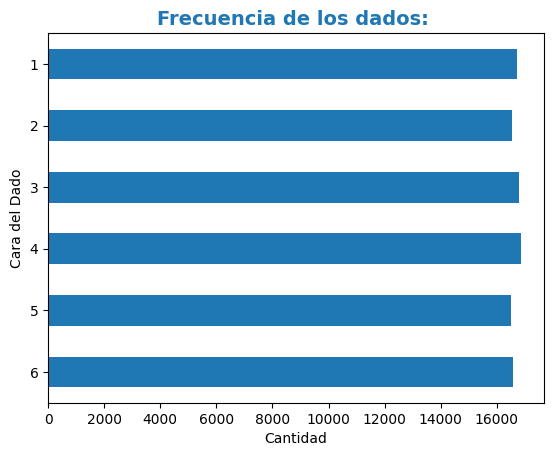

In [100]:
tiradas = 100000
dados = np.random.randint(1,7, size = tiradas)
dados = pd.DataFrame(dados,columns=['cara'])
dados.sort_values(by=['cara'], inplace=True, ascending=False)
dados.cara.value_counts(sort=False).plot(kind='barh')
plt.title("Frecuencia de los dados: ", fontdict = {'fontsize':14, 'fontweight' : 'bold', 'color' : 'tab:blue'})
plt.ylabel("Cara del Dado")
plt.xlabel("Cantidad")

Creamos la funcion muestreo(), que recibe un DataFrame y devuelve una muestra del mismo en base a un nivel de confianza y un margen de error:

In [112]:
import pandas as pd
import numpy as np

# Muestreo aleatorio con nivel de confianza y margen de error
def muestreo(df):
    N = len(df)  # Población
    p = 0.5  # Proporción de la población con la característica que busco. En general se utiliza 0.5
    Z = 2.58  # Nivel de confianza: 85%=1.44 , 90%=1.96, 99%=2.58
    e = 3  # Porcentaje del margen de error (Tolerancia +/-)
    
    # Definición de variables, como Z, p, e y N previamente:
    muestra_borrador = ((Z ** 2) * (p) * (1 - p)) / ((e / 100) ** 2)  # Calculamos el tamaño de la muestra sin contemplar correcciones o ajustes
    correccion = N / (muestra_borrador + N - 1)  # Nombre corregido de "correcion" a "correccion"
    muestra = muestra_borrador * correccion
    fraccion = muestra / N
    
    print("Mi dataframe tiene: ", len(df), " registros")
    print("Una muestra aleatoria simple representativa en base al nivel de confianza y margen de error establecido será de :", int(muestra), " registros")
    
    # Seleccionar una muestra aleatoria
    muestra_df = df.sample(n=int(muestra), random_state=42)  # Usamos sample para obtener una muestra aleatoria de tamaño 'muestra'
    
    # Crear un DataFrame con los datos de muestra y las fracciones
    muestra_info = pd.DataFrame({'muestra': [muestra], 'fraccion': [fraccion]})
    
    return muestra_df, muestra_info  # Retornar el DataFrame con los datos de la muestra y el resumen

# Suponiendo que tienes un DataFrame llamado 'dados', puedes usar la función así:
# dados_muestra, resumen = muestreo(dados)
# print(resumen)
# print(dados_muestra.head())  # Para ver las primeras filas de la muestra seleccionada aleatoriamente


In [110]:
print(dados.columns)

Index(['cara'], dtype='object')


Llamamos a la función muestreo pasandole el DataFrame con las tiradas de dados para analizar luego la frecuencia de los números en la muestra:

__ATENCION: CODIGO CORREGIDO:__

__Cambios:__

- En la función muestreo, ahora estamos usando df.sample(n=int(muestra)) para seleccionar aleatoriamente las filas de dados según el tamaño de la muestra calculado. Esto asegura que dados_muestra sea un DataFrame y no un tuple.
- El código posterior para ordenar, contar y graficar las frecuencias de las caras ahora debería funcionar correctamente.

Mi dataframe tiene:  6000  registros
Una muestra aleatoria simple representativa en base al nivel de confianza y margen de error establecido será de : 1413  registros


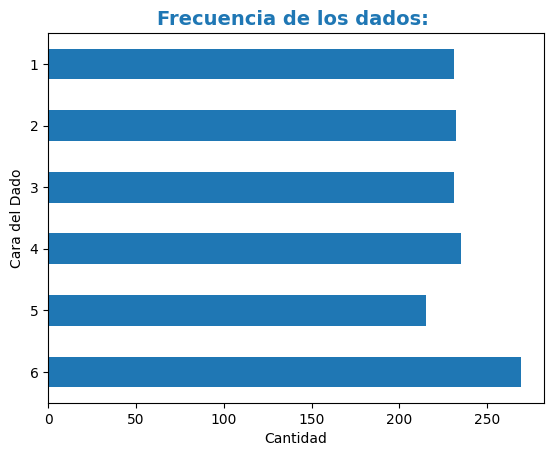

Como se puede apreciar, la muestra es representativa, ya que no se altera significativamente la frecuencia tirando los dados 100.000 veces o  1413


In [115]:
import pandas as pd
import matplotlib.pyplot as plt

# Muestreo aleatorio
def muestreo(df):
    N = len(df)  # Población
    p = 0.5  # Proporción de la población con la característica que busco. En general se utiliza 0.5
    Z = 2.58  # Nivel de confianza: 85%=1.44, 90%=1.96, 99%=2.58 
    e = 3  # Porcentaje del margen de error (Tolerancia +/-)
    
    # Cálculos del tamaño de la muestra
    muestra_borrador = ((Z**2) * (p) * (1-p))/((e/100)**2)  # Calculamos el tamaño de la muestra sin contemplar correcciones o ajustes
    correccion = N / (muestra_borrador + N - 1)  # Nombre corregido de "correcion" a "correccion"
    muestra = muestra_borrador * correccion
    fraccion = muestra / N 
    
    print("Mi dataframe tiene: ", len(df), " registros")
    print("Una muestra aleatoria simple representativa en base al nivel de confianza y margen de error establecido será de :", int(muestra), " registros")
    
    # Tomamos una muestra aleatoria del DataFrame
    dados_muestra = df.sample(n=int(muestra))  # Tomamos una muestra de tamaño 'muestra'
    
    return dados_muestra  # Retornar el DataFrame con la muestra

# Simulando el DataFrame 'dados'
dados = pd.DataFrame({
    'cara': [1, 2, 3, 4, 5, 6] * 1000  # Simulamos 1000 lanzamientos de dados con valores de 1 a 6
})

# Llamada a la función
dados_muestra = muestreo(dados)

# Ordenamos los valores de la columna 'cara'
dados_muestra.sort_values(by=['cara'], inplace=True, ascending=False)

# Contamos las frecuencias de cada valor en la columna 'cara' y graficamos
dados_muestra.cara.value_counts(sort=False).plot(kind='barh')

# Configuración del gráfico
plt.title("Frecuencia de los dados: ", fontdict={'fontsize': 14, 'fontweight': 'bold', 'color': 'tab:blue'})
plt.ylabel("Cara del Dado")
plt.xlabel("Cantidad")

# Mostrar el gráfico
plt.show()

# Imprimir mensaje
print("Como se puede apreciar, la muestra es representativa, ya que no se altera significativamente la frecuencia tirando los dados 100.000 veces o ", len(dados_muestra))


- Probemos ahora con nuestro DataFrame original

In [116]:
df_muestra = muestreo(df)

Mi dataframe tiene:  1320  registros
Una muestra aleatoria simple representativa en base al nivel de confianza y margen de error establecido será de : 770  registros


__LEY DE BENFORD__

Vamos a trabajar la columna de importe para detectar fraude utilizando la Ley del primer dígito (Ley de Benford)

La Ley de Benford se aplica a grandes conjuntos de numeros ordenados y NO aleatorios, ya que si así fuera, estariamos entrando en probabilidad y estadística.

In [118]:
# Declaramos una lista vacía
lista_primer_dígito = []

# Llenamos la lista con el primer dígito de cada importe de nuestro DataFrame
for importe in list(df.importe):
    lista_primer_dígito.append(str(importe)[0])  # Agregamos el primer dígito como string

# Vemos la cantidad de datos que guardó la lista
len(lista_primer_dígito)


1320

In [119]:
df.importe.head(10) 

0   12,100.00
1   13,500.00
2   13,500.00
3    1,200.00
4    6,050.00
5   36,656.00
6   36,656.00
7   24,002.50
8   24,002.50
9   13,746.00
Name: importe, dtype: Float64

In [121]:
lista_primer_dígito[0:10] # Veo los primeros 10 elementos

['1', '1', '1', '1', '6', '3', '3', '2', '2', '1']

Los numeros coinciden. Ahora compararemos la frecuencia de nuestros primero dígitos vs la frecuencia de Benford y luego lo graficaremos:

__NOTA: Correcciones y mejoras:__
- Definir nombre de columna al crear **mis_datos**
Se usa **columns=['dígito']** para evitar errores al referenciar columnas.

- Se usa **.to_frame(name='frecuencia')** en **value_counts()**
Así, **mis_datos** tendrá una columna con nombre en lugar de un índice sin nombre.

- Cálculo correcto del porcentaje usando la columna **frecuencia**
Se hace referencia explícita a **mis_datos['frecuencia']** para evitar confusión.

In [123]:
# Ordenamos la lista
lista_primer_dígito.sort()

# Convertimos la lista a un DataFrame con una columna explícita
mis_datos = pd.DataFrame(lista_primer_dígito, columns=['digito'])

# Contamos las frecuencias y creamos un DataFrame
mis_datos = mis_datos['digito'].value_counts().to_frame(name='frecuencia')

# Calculamos el porcentaje de cada frecuencia
mis_datos['porcentaje'] = (mis_datos['frecuencia'] / mis_datos['frecuencia'].sum()) * 100

# Mostramos el DataFrame
mis_datos


,frecuencia,porcentaje
digito,,
1,418,31.67
2,232,17.58
3,160,12.12
4,126,9.55
5,105,7.95
6,77,5.83
7,77,5.83
9,73,5.53
8,52,3.94


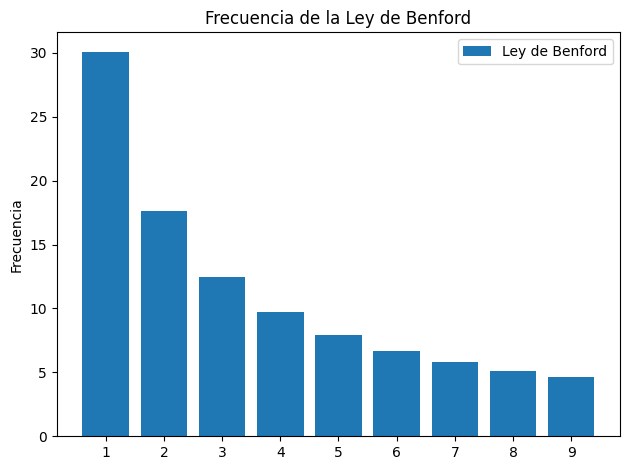

In [124]:
benford = [30.1, 17.6, 12.5, 9.7, 7.9, 6.7, 5.8, 5.1, 4.6]
numeros=[1,2,3,4,5,6,7,8,9]
# Obtenemos la posición de cada etiqueta en el eje de x.
x = np.arange(len(numeros))
# Tamaño de cada barra
fig, ax = plt.subplots()
# Generamos las barras para la Ley de Benford
rects1 = ax.bar(x , benford, label='Ley de Benford')
# Añadimos las etiquetas de identificación de valores ene el gráfico
ax.set_ylabel('Frecuencia')
ax.set_title('Frecuencia de la Ley de Benford')
ax.set_xticks(x)
# Añadimos un legen() esto permite mostrar con colores a que pertence cada valor
ax.legend()
fig.tight_layout()
ax.set_xticklabels(('1', '2', '3', '4', '5', '6', '7', '8', '9'))
# Mostamos la gráfica con el método show()
plt.show()


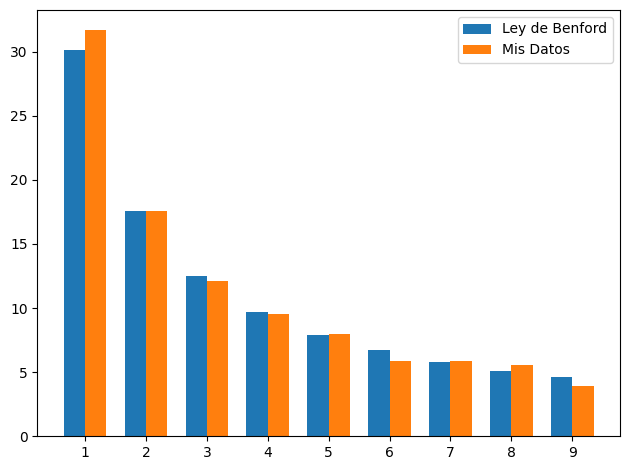

In [125]:
# Tamaño de cada barra
width = 0.35
fig, ax = plt.subplots()
# Generamos las barras para la Ley de Benford
rects1 = ax.bar(x - width/2, benford, width, label='Ley de Benford')
# Generamos las barras para la frecuencia de mis datos
rects2 = ax.bar(x + width/2, mis_datos['porcentaje'], width, label='Mis Datos')
ax.set_xticks(x)
# Añadimos un legen() esto permite mostrar con colores a que pertenece cada valor.
ax.legend()
fig.tight_layout()
ax.set_xticklabels(('1', '2', '3', '4', '5', '6', '7', '8', '9'))
# Mostramos la gráfica con el método show()
plt.show()

__INSIGHTS__

Los datos analizados corresponden a 1798 registros de una base de datos de compras COVID del GCBA.
El período auditado comprende desde el 06/01/2020 al 29/06/2021 (540 días) y las columnas y tios de datos analizados son:

- 0 fecha 1798 valores
- 1 nro_pliego 1444 valores
- 2 nro_orden_de_compra 1798 valores
- 3 unidad_ejecutora 1460 valores
- 4 jurisdicción 1798 valores
- 5 proveedor 1798 valores
- 6 cuit 1798 valores
- 7 importe 1798 valores
- 8 descripción 1444 valores
- 9 cantidad 1773 valores
- 10 descripcion_rubro 1444 valores

Se realizaron tareas de depuración para optimizar la utilizacion de registros. En este sentido, se eliminaron registros duplicados, se incorporó un valor ('NaN'), para valores nulos en textos y se eliminaron registros con datos faltantes en importe y cantidad.
De los registros duplicados, una gran parte corresponden a tres proveedores: RH+ SA (116), GEDOX SA(36) y CEGENS SA(30).

La suma total involucrada del campo importe asciende a %5.391.310.486 (5 Billones de pesos) donde más del 60% se repartió entre 4 proveedores:
- ABBOTT RAPID DIAGNOSTICS ARGENTINA SA 889.491.532 (25.98%)
- BIODIAGNOSTICO SA 511.095.513 (14.93%)
- TECNOLAB SA 380.209.759 (11.11%)

Los proveedores que más ordenes de compra tuvieron (en cantidad) son:

- RH+ SA 128
- CEGENS SA 116
- DROGUERIA MARTORANI SA 72
- DROGUERIA FARMATEC SA 63

En relacion a la aplicación de la Ley de Benford (o Ley del primer dígito) al primer dígito del importe de las órdenes de compra, no se encuentran diferencias significativas que den indicio de que los datos hayan sido manipulados manualmente.

Para trabajar en el segundo taller, vamos a guardar diferentes conjuntos de datos en archivo excel, prodia ser csv u otro.

In [ ]:
df_proveedores.to_excel('/content/gdrive/MyDrive/taller_python/df_proveedores.xlsx')
df_faltantes.to_excel('/content/gdrive/MyDrive/taller_python/df_faltantes.xlsx')
df_pivot.to_excel('/content/gdrive/MyDrive/taller_python/df_pivot.xlsx')